<a href="https://colab.research.google.com/github/po1ss0n/google_colabs/blob/main/create_movie_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ffmpeg-python
!pip install bar_chart_race
!pip install --upgrade bar_chart_race # ライブラリを最新バージョンにアップグレード
!pip install japanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3ef54cfb488b567fb31905647f44b051b18d413f4c4a44e1741471a4ea4fc7f9
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import matplotlib as mpl
import bar_chart_race as bcr
import japanize_matplotlib

In [ ]:
# prompt: Google Driveからcsvファイルを読み込み

from google.colab import drive
drive.mount('/content/drive')

male_data = pd.read_csv('/content/drive/My Drive/japan_male_population.csv')
female_data = pd.read_csv('/content/drive/My Drive/japan_female_population.csv')


Mounted at /content/drive


In [ ]:
# prompt: male_dataの 2列目をラベル列として別名で切り出す。結果を表示

male_labels = male_data.iloc[3:, 1]
male_x = male_data.iloc[0, 2:]
male_element = male_data.iloc[3:, 2:].fillna(0)
male_element = male_element.astype(int)

male_element.index = male_labels
male_element.columns = male_x
male_element.index.name = 'Prefecture'
male_element.columns.name = 'Year'

bcr_data_male = male_element.T # male_elementを転置
print(bcr_data_male.head())

Prefecture  北 海 道  青 森 県  岩 手 県  宮 城 県  秋 田 県  山 形 県  福 島 県  茨 城 県  栃 木 県  \
Year                                                                        
1920         1244    381    421    485    454    478    674    662    514   
1921         1255    386    426    493    456    483    682    665    517   
1922         1269    390    431    500    471    486    684    671    522   
1923         1284    394    439    516    474    494    700    683    532   
1924         1292    398    442    522    466    498    705    687    535   

Prefecture  群 馬 県  ...  愛 媛 県  高 知 県  福 岡 県  佐 賀 県  長 崎 県  熊 本 県  大 分 県  \
Year               ...                                                    
1920          514  ...    515    332   1117    330    584    602    423   
1921          519  ...    520    336   1126    334    586    609    427   
1922          523  ...    526    336   1137    335    588    618    433   
1923          536  ...    536    338   1149    335    590    628    441   
1924      

In [ ]:
female_labels = female_data.iloc[3:, 1]
female_element = female_data.iloc[3:, 2:].fillna(0)
female_element = female_element.astype(int)
female_element.index = female_labels
female_element.index.name = 'Prefecture'
female_element.columns.name = 'Year'

bcr_data_female = female_element.T # male_elementを転置
print(bcr_data_female.head())

Prefecture  北 海 道  青 森 県  岩 手 県  宮 城 県  秋 田 県  山 形 県  福 島 県  茨 城 県  栃 木 県  \
Year                                                                        
1920         1115    375    424    476    445    491    689    688    532   
1921         1130    381    429    484    448    496    698    690    536   
1922         1147    384    434    492    460    499    701    694    542   
1923         1164    389    441    506    465    508    715    705    551   
1924         1175    393    445    513    460    511    720    711    555   

Prefecture  群 馬 県  ...  愛 媛 県  高 知 県  福 岡 県  佐 賀 県  長 崎 県  熊 本 県  大 分 県  \
Year               ...                                                    
1920          539  ...    531    339   1071    344    552    631    438   
1921          543  ...    535    343   1083    348    555    635    442   
1922          547  ...    541    342   1096    349    559    642    446   
1923          557  ...    548    343   1111    348    563    651    453   
1924      

In [ ]:
bcr_data_all = bcr_data_male + bcr_data_female
bcr_data_all.head()

Prefecture,北 海 道,青 森 県,岩 手 県,宮 城 県,秋 田 県,山 形 県,福 島 県,茨 城 県,栃 木 県,群 馬 県,...,愛 媛 県,高 知 県,福 岡 県,佐 賀 県,長 崎 県,熊 本 県,大 分 県,宮 崎 県,鹿児島県,沖 縄 県
Year,,,,,,,,,,,,,,,,,,,,,
1920,2359,756,845,961,899,969,1363,1350,1046,1053,...,1046,671,2188,674,1136,1233,861,651,1415,572
1921,2385,767,855,977,904,979,1380,1355,1053,1062,...,1055,679,2209,682,1141,1244,869,657,1426,570
1922,2416,774,865,992,931,985,1385,1365,1064,1070,...,1067,678,2233,684,1147,1260,879,665,1436,570
1923,2448,783,880,1022,939,1002,1415,1388,1083,1093,...,1084,681,2260,683,1153,1279,894,676,1452,568
1924,2467,791,887,1035,926,1009,1425,1398,1090,1106,...,1088,685,2276,682,1157,1284,902,681,1460,563


In [ ]:

# アニメーション化された棒グラフを作成
bcr.bar_chart_race(
    df=bcr_data_male,
    filename='male_population_bcr.mp4',  # 保存するファイル名
    orientation='h',                # 'h' for horizontal, 'v' for vertical
    sort='desc',                    # 'asc' for ascending, 'desc' for descending
    n_bars=20,                       # 表示するバーの数
    fixed_order=False,              # バーの固定順序
    fixed_max=False,                 # 軸の最大値を固定
    steps_per_period=10,            # 各期間ごとのステップ数
    period_length=500,              # 各期間の長さ（ミリ秒）
    period_label={'x': .95, 'y': .15, 'ha': 'right'},  # 期間ラベルの位置
    perpendicular_bar_func='mean',  # バーに対する垂直線の関数
    title='Bar Chart Race Example', # グラフのタイトル
    bar_size=.95,                   # バーのサイズ
    figsize=(6.5, 3.5),             # 図のサイズ
    dpi=144,                        # 解像度
    writer=None,                    # ライター
    fig=None,                       # 図
    bar_kwargs={'alpha': .7},       # バーの追加キーワード
    filter_column_colors=False      # カラム色のフィルタ
)


NameError: name 'bcr' is not defined

In [ ]:
#plt.style.use('dark_background')
bcr.bar_chart_race(
    df=bcr_data_all,
    filename='bcr_japan_population.mp4',  # 保存するファイル名
    orientation='h',                # 'h' for horizontal, 'v' for vertical
    sort='desc',                    # 'asc' for ascending, 'desc' for descending
    n_bars=20,                      # 表示するバーの数
    fixed_order=False,              # バーの固定順序
    fixed_max=False,                # 軸の最大値を固定
    steps_per_period=10,            # 各期間ごとのステップ数
    period_length=500,              # 各期間の長さ（ミリ秒）
    interpolate_period=False,        # 期間の補完
    period_label={'x': .95, 'y': .15, 'ha': 'right', 'color': 'gray', 'weight': 'bold'},  # 期間ラベルの位置と色
    perpendicular_bar_func='mean',  # バーに対する垂直線の関数
    title='各都道府県の人口', # グラフのタイトル
    bar_size=.95,                   # バーのサイズ
    figsize=(6.5, 3.5),             # 図のサイズ
    dpi=144,                        # 解像度
    writer=None,                    # ライター
    fig=None,                       # 図
    bar_kwargs={'alpha': .7},       # バーの追加キーワード
    filter_column_colors=True,      # カラム色のフィルタ
    shared_fontdict={'color': 'gray'}
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


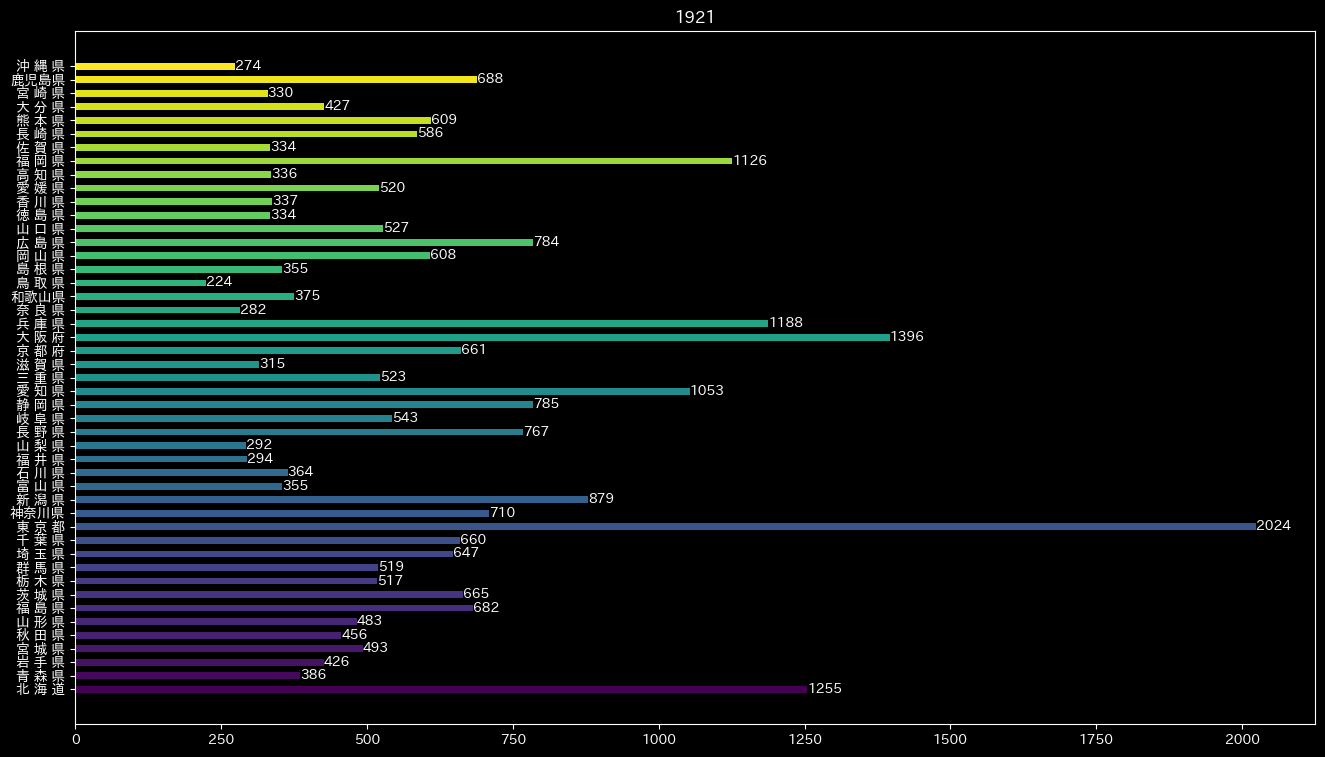

In [ ]:

# プロットするための準備
fig, ax = plt.subplots()

# 指定した列のインデックス
n = 3  # 例として3列目を選択

if n < male_data.shape[1]:
    bar_height = 0.5
    plt.style.use('dark_background')  # ダークテーマのスタイルを適用
    try:
        y = male_data.iloc[3:, n].astype(float)  # 2行目以降の数値データ
    except ValueError:
        print(f"列 {n} に数値以外のデータが含まれています。")
        print(male_data.iloc[3:, n])
    else:
        x = np.arange(len(y))
        colors = plt.cm.viridis(np.linspace(0, 1, len(y)))  # 色のグラデーションを生成
        fig.set_size_inches(16, 9)  # サイズ比率を16:9に設定
        ax.barh(x, y, height=bar_height, color=colors)  # 横棒グラフに変更し、色を適用
        ax.bar_label(ax.containers[0], fmt='%.0f') # 値を表示 (小数点以下1桁)
        ax.set_yticks(x)
        ax.set_yticklabels(male_data.iloc[3:, 1], rotation=0, ha='right')  # 0列目の値をy軸のラベルに設定
        ax.set_title(f"{male_data.iloc[0, n]}")  # 0行目の値をタイトルに設定
        plt.show()


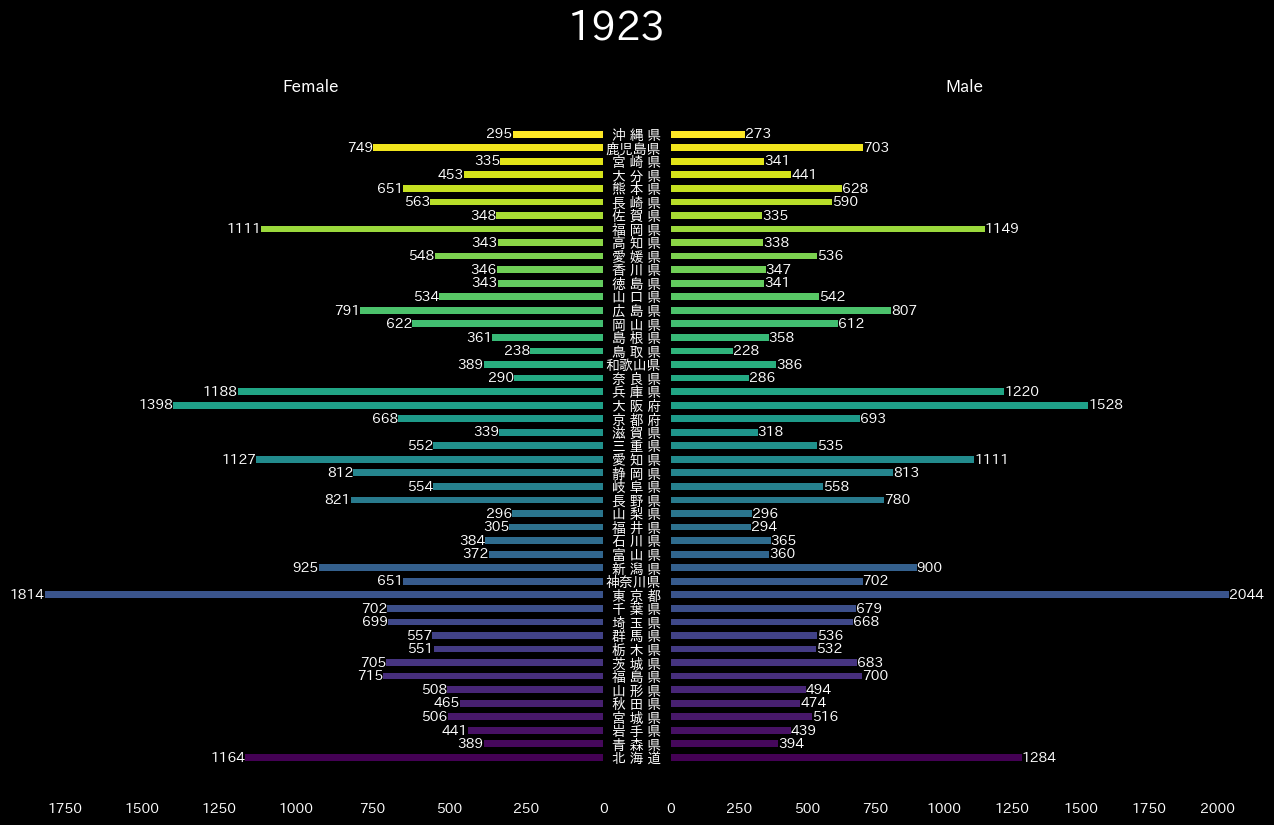

In [ ]:
# プロットするための準備
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9))  # 横に2つのグラフを並べる

# グラフ間の余白を調整（wspaceを小さく設定）
plt.subplots_adjust(wspace=0.115)

# 指定した列のインデックス
n = 3  # 例として3列目を選択

# 囲い（枠線）をなくすための設定
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(left=False, bottom=False)  # 目盛りを非表示にする
    ax.yaxis.set_ticks_position('none')  # Y軸の目盛りを消去

# 女性データのプロット（左側）
if n < bcr_data_female.shape[1]:
    bar_height = 0.5
    plt.style.use('dark_background')  # ダークテーマのスタイルを適用
    try:
        y_female = bcr_data_female.iloc[n, :].astype(float)  # 3行目以降の数値データ
    except ValueError:
        print(f"列 {n} に数値以外のデータが含まれています。")
        print(bcr_data_female.iloc[n, :])
    else:
        x = np.arange(len(y_female))
        colors_female = plt.cm.viridis(np.linspace(0, 1, len(y_female)))  # 色のグラデーションを生成
        bars = ax1.barh(x, y_female, height=bar_height, color=colors_female)  # 通常通り棒グラフを描画
        ax1.set_yticks(x)
        ax1.set_yticklabels([])  # 縦軸ラベルを消去
        ax1.set_title(f"Female")  # 0行目の値をタイトルに設定
        ax1.invert_xaxis()  # X軸の方向を逆にして、棒グラフを反転させる
        ax1.bar_label(bars, fmt='%.0f')  # 値を表示 (小数点以下1桁)

# 男性データのプロット（右側）
if n < bcr_data_male.shape[1]:
    try:
        y_male = bcr_data_male.iloc[n, :].astype(float)  # 3行目以降の数値データ
    except ValueError:
        print(f"列 {n} に数値以外のデータが含まれています。")
        print(bcr_data_male.iloc[n, :])
    else:
        colors_male = plt.cm.viridis(np.linspace(0, 1, len(y_male)))  # 色のグラデーションを生成
        bars = ax2.barh(x, y_male, height=bar_height, color=colors_male)  # 横棒グラフに変更し、色を適用
        ax2.bar_label(bars, fmt='%.0f')  # 値を表示 (小数点以下1桁)
        ax2.set_yticks(x)
        ax2.set_yticklabels(bcr_data_male.columns, rotation=0, ha='right')  # 列ラベルを設定
        ax2.set_title(f"Male")  # 0行目の値をタイトルに設定

plt.suptitle(f"{bcr_data_male.index[n]}", fontsize=28)
plt.show()


Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 0
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 1
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n = 2
Processing n =

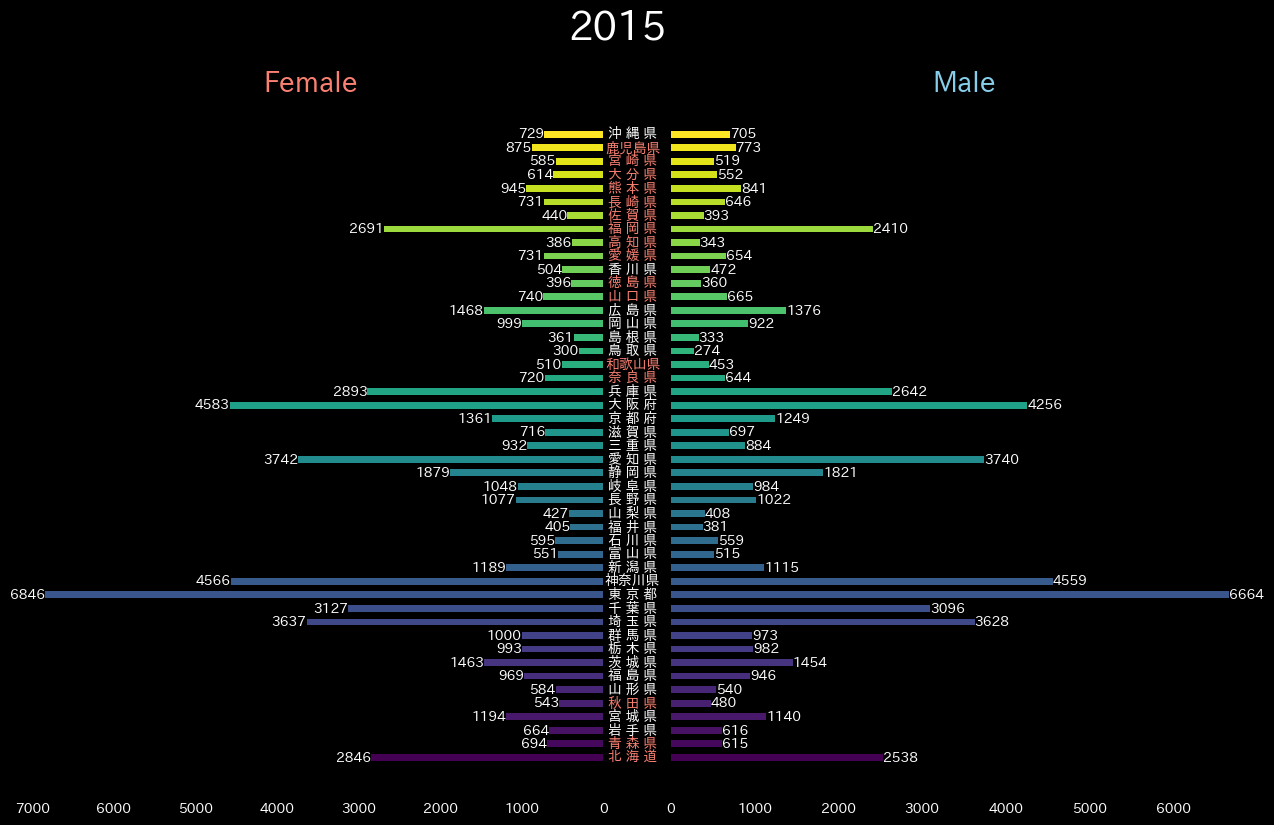

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# プロットするための準備
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9))  # 横に2つのグラフを並べる

# グラフ間の余白を調整（wspaceを小さく設定）
plt.subplots_adjust(wspace=0.115)
plt.style.use('dark_background')

# 補間を行うための設定
frames = 20  # 各nとn+1間のフレーム数
total_columns = bcr_data_female.shape[0]

# 初期化関数
def init():
    ax1.clear()
    ax2.clear()
    plt.suptitle("Comparison of Male and Female Data", fontsize=28)
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(left=False, bottom=False)
        ax.yaxis.set_ticks_position('none')

# 更新関数
def update(frame):
    init()  # 初期化

    # nを計算し、次のn+1を設定
    n = frame // frames
    alpha = (frame % frames) / frames  # 補間パラメータ

    # nの値を表示
    print(f"Processing n = {n}")

    # 最後の列の場合は終了
    if n >= total_columns - 1:
        return

    # nとn+1の間を補間
    interp_female = (1 - alpha) * bcr_data_female.iloc[n, :] + alpha * bcr_data_female.iloc[n + 1, :]
    interp_male = (1 - alpha) * bcr_data_male.iloc[n, :] + alpha * bcr_data_male.iloc[n + 1, :]

    # 女性データのプロット
    x = np.arange(len(interp_female))
    colors_female = plt.cm.viridis(np.linspace(0, 1, len(interp_female)))
    bars_female = ax1.barh(x, interp_female, height=0.5, color=colors_female)
    ax1.set_yticks(x)
    ax1.set_yticklabels([])  # 縦軸ラベルを消去

    # カテゴリごとのラベル色を決定
    for i in range(len(interp_female)):
        if interp_female.iloc[i] > interp_male.iloc[i] * 1.1:
            color = 'salmon'
        elif interp_male.iloc[i] > interp_female.iloc[i] * 1.1:
            color = 'skyblue'
        else:
            color = 'white'

        # ラベルの色を設定して両グラフの間に表示
        ax1.text(1.05, i, bcr_data_female.columns[i], ha='center', va='center', color=color, transform=ax1.get_yaxis_transform())

    ax1.set_title(f"Female", fontsize=20, color='salmon')
    ax1.invert_xaxis()
    ax1.bar_label(bars_female, fmt='%.0f')

    # 男性データのプロット
    colors_male = plt.cm.viridis(np.linspace(0, 1, len(interp_male)))
    bars_male = ax2.barh(x, interp_male, height=0.5, color=colors_male)
    ax2.set_yticks(x)
    ax2.set_yticklabels([])  # ラベルは個別に設定するので、ここでは消去
    ax2.set_title(f"Male", fontsize=20, color='skyblue')  # フォントサイズとカラーを設定
    ax2.bar_label(bars_male, fmt='%.0f')

    # 全体のタイトル
    plt.suptitle(f"{bcr_data_male.index[n + 1]}", fontsize=28)

# アニメーションの作成
ani = animation.FuncAnimation(fig, update, frames=frames * (total_columns - 1), init_func=init, blit=False, repeat=False)

# アニメーションをMP4ファイルとして保存
ani.save('animation.mp4', writer='ffmpeg', fps=30)

plt.show()
